In [1]:
import sys
sys.path.insert(0, '../scripts/')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ruler.measures.cwl_rbp import RBPCWLMetric
from ruler.measures.cwl_inst import INSTCWLMetric
from ruler.measures.cwl_bpm import BPMDCWLMetric
from ruler.measures.cwl_rr import RRCWLMetric
from ruler.measures.cwl_ap import APCWLMetric
from ruler.measures.cwl_tbg import TBGCWLMetric

from ruler.cwl_ruler import Ranking

In [2]:
g1 = [ 0,0,1,1,0,0,1,0,1,0]
c1 = [ 12,13,2,3,4,5,6,33,1,1]
t1 = Ranking("T1",g1,c1)

In [3]:
rbp = RBPCWLMetric(theta=0.7)
rbp.measure(t1)
rbp.report()

T1	RBP@0.7	0.3025	1.0083	8.5576	28.5255	3.3333


In [4]:
print(rbp.c_vector(t1)[0:10])

[ 0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7]


In [5]:
print(rbp.w_vector(t1)[0:10])

[ 0.3         0.21        0.147       0.1029      0.07203     0.050421
  0.0352947   0.02470629  0.0172944   0.01210608]


In [6]:
print(rbp.l_vector(t1)[0:10])

[ 0.3         0.21        0.147       0.1029      0.07203     0.050421
  0.0352947   0.02470629  0.0172944   0.01210608]


In [7]:
inst = INSTCWLMetric(T=1)
inst.measure(t1)
inst.report()

T1	INST-T=1	0.2073	0.4437	9.5302	20.4015	2.1408


In [8]:
print(inst.c_vector(t1)[0:10])

[ 0.44444444  0.5625      0.5625      0.5625      0.64        0.69444444
  0.69444444  0.73469388  0.73469388  0.765625  ]


In [9]:
print(inst.w_vector(t1)[0:10])

[ 0.46711434  0.20760637  0.11677859  0.06568795  0.03694947  0.02364766
  0.01642199  0.01140416  0.00837857  0.00615568]


In [10]:
print(inst.l_vector(t1)[0:10])

[ 0.55555556  0.19444444  0.109375    0.06152344  0.02847656  0.01546875
  0.01074219  0.0064772   0.00475876  0.00308862]


In [11]:
bpm = BPMDCWLMetric(T=3,K=45)
bpm.measure(t1)
bpm.report()

T1	BPM-Dynamic-T=3-K=45-hb=1.0-hc=1.0	0.4286	3.0000	6.4286	45.0000	7.0000


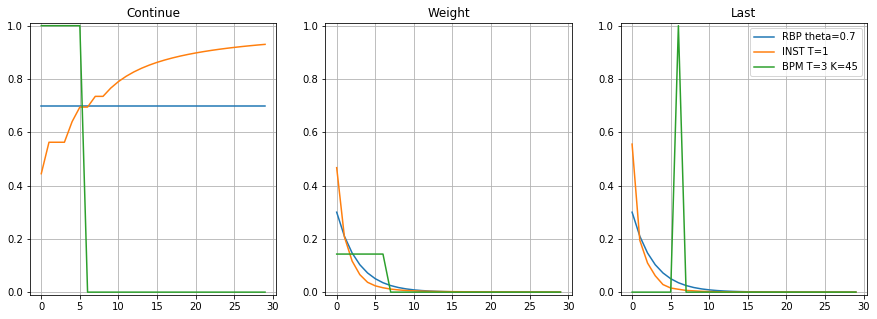

In [12]:
n=30
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=0.2)

ax = plt.subplot(131)
plt.title('Continue')
plt.plot(range(0,n),rbp.c_vector(t1)[0:n])
plt.plot(range(0,n),inst.c_vector(t1)[0:n])
plt.plot(range(0,n),bpm.c_vector(t1)[0:n])
plt.grid(True)
ax.set_ylim(ymin=-0.01, ymax=1.01)

ax = plt.subplot(132)
plt.title('Weight')
plt.plot(range(0,n),rbp.w_vector(t1)[0:n])
plt.plot(range(0,n),inst.w_vector(t1)[0:n])
plt.plot(range(0,n),bpm.w_vector(t1)[0:n])
plt.grid(True)
ax.set_ylim(ymin=-0.01, ymax=1.01)

ax = plt.subplot(133)
plt.title('Last')
plt.plot(range(0,n),rbp.l_vector(t1)[0:n])
plt.plot(range(0,n),inst.l_vector(t1)[0:n])
plt.plot(range(0,n),bpm.l_vector(t1)[0:n])
plt.grid(True)
ax.set_ylim(ymin=-0.01, ymax=1.01)
plt.legend(['RBP theta=0.7','INST T=1','BPM T=3 K=45'])


In [13]:
g1 = [ 1,1,0,0,0,0,1,0,1,0]
c1 = [ 1,1,1,1,1,1,1,1,1,1]

t2 = Ranking("T2",g1,c1)

bpm38 = BPMDCWLMetric(T=3, K=8, hc=1.0, hb=1.0)
bpm33 = BPMDCWLMetric(T=5, K=4, hc=1.0, hb=1.0)
bpm38.measure(t2)
bpm33.measure(t2)

2.0

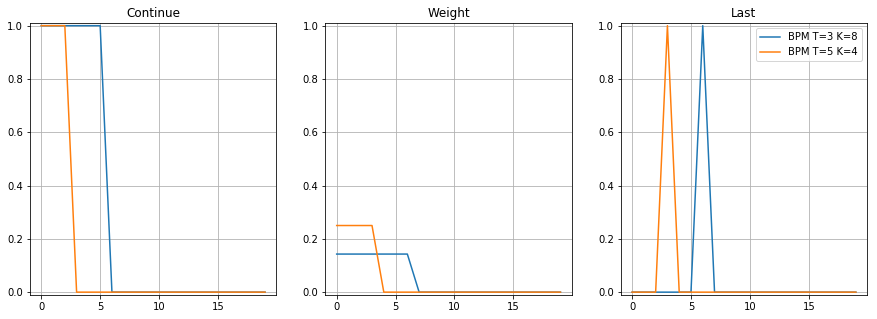

In [14]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=0.2)
ax = plt.subplot(131)
plt.title('Continue')
n=20
plt.plot(range(0,n),bpm38.c_vector(t2)[0:n])
plt.plot(range(0,n),bpm33.c_vector(t2)[0:n])

plt.grid(True)
ax.set_ylim(ymin=-0.01, ymax=1.01)

ax = plt.subplot(132)
plt.title('Weight')
plt.plot(range(0,n),bpm38.w_vector(t2)[0:n])
plt.plot(range(0,n),bpm33.w_vector(t2)[0:n])
plt.grid(True)
ax.set_ylim(ymin=-0.01, ymax=1.01)

ax = plt.subplot(133)
plt.title('Last')
plt.plot(range(0,n),bpm38.l_vector(t2)[0:n])
plt.plot(range(0,n),bpm33.l_vector(t2)[0:n])
plt.grid(True)
ax.set_ylim(ymin=-0.01, ymax=1.01)
plt.legend(['BPM T=3 K=8', 'BPM T=5 K=4'])

In [15]:
rr = RRCWLMetric()
rr.measure(t1)
rr.report()

T1	RR	0.3333	1.0000	9.0000	27.0000	3.0000


In [16]:
ap = APCWLMetric()
ap.measure(t1)
ap.report()

T1	AP	0.4266	2.0379	7.9266	37.8673	4.7773


In [21]:
tbg = TBGCWLMetric(halflife=20)
tbg.measure(t1)
tbg.report()

T1	TBG-H@20 	0.1178	0.3461	12.8798	37.8543	2.9390


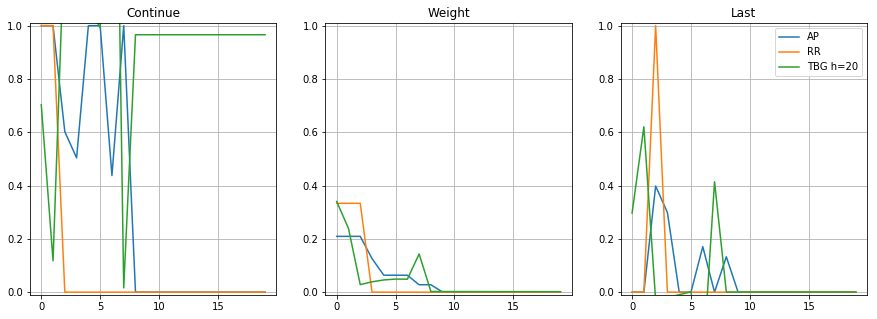

In [22]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=0.2)
ax = plt.subplot(131)
plt.title('Continue')
n=20
plt.plot(range(0,n),ap.c_vector(t1)[0:n])
plt.plot(range(0,n),rr.c_vector(t1)[0:n])
plt.plot(range(0,n),tbg.c_vector(t1)[0:n])


plt.grid(True)
ax.set_ylim(ymin=-0.01, ymax=1.01)

ax = plt.subplot(132)
plt.title('Weight')
plt.plot(range(0,n),ap.w_vector(t1)[0:n])
plt.plot(range(0,n),rr.w_vector(t1)[0:n])
plt.plot(range(0,n),tbg.w_vector(t1)[0:n])
plt.grid(True)
ax.set_ylim(ymin=-0.01, ymax=1.01)

ax = plt.subplot(133)
plt.title('Last')
plt.plot(range(0,n),ap.l_vector(t1)[0:n])
plt.plot(range(0,n),rr.l_vector(t1)[0:n])
plt.plot(range(0,n),tbg.l_vector(t1)[0:n])


plt.grid(True)
ax.set_ylim(ymin=-0.01, ymax=1.01)
plt.legend(['AP', 'RR', 'TBG h=20'])

